# Hands-On ML - Chapter 3

In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [2]:
X, y = mnist['data'], mnist['target']

In [3]:
X.shape, y.shape

((70000, 784), (70000,))

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [5]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)

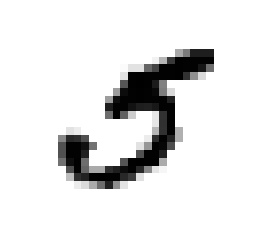

In [6]:
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary)
plt.axis('off')
plt.show()

In [7]:
y[36000]

5.0

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [9]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## Five detector

In [13]:
y_train_5 = y_train == 5
y_test_5 = y_test == 5

In [14]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique,counts))

{0.0: 980,
 1.0: 1135,
 2.0: 1032,
 3.0: 1010,
 4.0: 982,
 5.0: 892,
 6.0: 958,
 7.0: 1028,
 8.0: 974,
 9.0: 1009}

In [15]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, max_iter=100)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=100, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [84]:
sgd_clf.predict([some_digit])

array([ True])

### Five detector - metrics

In [85]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.9599 , 0.9671 , 0.96395])

Take care to misinterpret this 95% score as good. A Never-5-Classifier has an accuracy of 90%!

In [101]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [102]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[54135,   444],
       [ 1737,  3684]])

In [103]:
from sklearn.metrics import precision_score, recall_score

In [104]:
precision_score(y_train_5, y_train_pred)

0.8924418604651163

In [105]:
recall_score(y_train_5, y_train_pred)

0.679579413392363

In [106]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7715991203267358

note that there is a tradeoff to me made between recall and precision

## Multiclass classification

In [16]:
sgd_clf.fit(X_train, y_train) # x_train not x_train_5
sgd_clf.predict([some_digit])

array([5.])

In [17]:
sgd_clf.decision_function([some_digit])

array([[ -6284.07784482, -29052.17210376,  -2960.45301671,
         -5052.67370067, -22934.14839998,   2440.78837474,
        -31455.10443669, -19524.4990848 , -23629.40737043,
        -39529.19372819]])

In [18]:
np.argmax(sgd_clf.decision_function([some_digit]))

5

In [19]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42, max_iter=50))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([5.])

In [20]:
len(ovo_clf.estimators_)

45

In [21]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

In [22]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([5.])

In [23]:
forest_clf.predict_proba([some_digit])

array([[0.1, 0. , 0. , 0. , 0. , 0.9, 0. , 0. , 0. , 0. ]])

In [25]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.8739752 , 0.86049302, 0.8646797 ])

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.91356729, 0.90899545, 0.91423714])

## Multilabel and Multioutput Classification